In [1]:


# Import bluesky and ophyd
import matplotlib.pyplot as plt
from bluesky import RunEngine
from bluesky.run_engine import get_bluesky_event_loop
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plan_stubs import read
from bluesky.plans import count

import asyncio


from bluesky.utils import ProgressBarManager
from secop_ophyd.SECoPDevices import SECoP_Node_Device
from AsyncSecopClient import *
from SECoPSignal import deep_get






In [2]:
## bluesky runengine setup
 
# Create a run engine, with plotting, progressbar and transform
RE = RunEngine({}, call_returns_result=True)
bec = BestEffortCallback()
RE.subscribe(bec)
RE.waiting_hook = ProgressBarManager()
RE.ignore_callback_exceptions = False
plt.ion()





In [3]:
robot_node = SECoP_Node_Device.create_external_loop(host='localhost',port ='10770',loop= RE.loop)

nested_node = SECoP_Node_Device.create_external_loop(host='localhost',port= '10771',loop= RE.loop)

sample_changer.HZB ready
ophyd_secop.frappy.demo ready


In [5]:
p = RE(count([nested_node.str_test], num=5, delay=5))




Transient Scan ID: 2     Time: 2023-08-09 12:05:13
Persistent Unique Scan ID: 'c0d6ed8e-56f4-41d3-95aa-68f7677b2090'


Run aborted
Traceback (most recent call last):
  File "/home/peter/git-repos/secop-ophyd/.venv/lib64/python3.11/site-packages/bluesky/run_engine.py", line 1528, in _run
    msg = self._plan_stack[-1].send(resp)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/peter/git-repos/secop-ophyd/.venv/lib64/python3.11/site-packages/bluesky/plans.py", line 81, in count
    return (yield from inner_count())
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/peter/git-repos/secop-ophyd/.venv/lib64/python3.11/site-packages/bluesky/utils/__init__.py", line 1202, in dec_inner
    return (yield from plan)
            ^^^^^^^^^^^^^^^
  File "/home/peter/git-repos/secop-ophyd/.venv/lib64/python3.11/site-packages/bluesky/preprocessors.py", line 964, in stage_wrapper
    return (yield from finalize_wrapper(inner(), unstage_devices()))
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/peter/git-repos/secop-ophyd/.venv/lib64/python3.11/site-packages/bluesky/preprocesso

rxthread ended with TypeError("'<' not supported between instances of 'NoneType' and 'float'")
try to reconnect to localhost:10771



ophyd_secop.frappy.demo ready


ConnectionError: connection closed before reply

{'sample_changer-HZB-storage-value': {'value': ["{'sample_name': 'KnusperkeksRittersport', 'substance': 'Knusperkeks', 'substance_code': '0', 'sample_pos': 1, 'manufacturer': 'Rittersport', 'sample_id': 'a7de4f38-8a60-42b9-a67a-c502ac8c43fc', 'color': 'brown', 'mass': 0.0167}"], 'timestamp': 1691575920.1993592}}


Transient Scan ID: 2     Time: 2023-08-09 12:12:00
Persistent Unique Scan ID: '7a949780-f442-4072-b8fa-6ed789c61ae2'
New stream: 'primary'
+-----------+------------+----------------------------------+
|   seq_num |       time | sample_changer-HZB-storage-value |
+-----------+------------+----------------------------------+
 failed to format row 


/home/peter/git-repos/secop-ophyd/.venv/lib64/python3.11/site-packages/bluesky/callbacks/best_effort.py:248: UserWarning: Omitting sample_changer-HZB-storage-value from plot because dtype is string
  warn("Omitting {} from plot because dtype is {}"


 failed to format row 
 failed to format row 
 failed to format row 
 failed to format row 
+-----------+------------+----------------------------------+
generator count ['7a949780'] (scan num: 2)





Transient Scan ID: 3     Time: 2023-08-09 12:12:05
Persistent Unique Scan ID: '4d07ee7d-e5a7-4337-882d-7f7f3c4655ee'
New stream: 'primary'
+-----------+------------+---------------------------------+
|   seq_num |       time | sample_changer-HZB-sample-value |
+-----------+------------+---------------------------------+
|         1 | 12:12:05.4 |                           0.000 |
|         2 | 12:12:06.4 |                           0.000 |
|         3 | 12:12:07.4 |                           0.000 |
|         4 | 12:12:08.4 |                           0.000 |
|         5 | 12:12:09.4 |                           0.000 |
+-----------+------------+---------------------------------+
generator count ['4d07ee7d'] (scan num: 3)



4d07ee7d-e5a7-4337-882d-7f7f3c4655ee


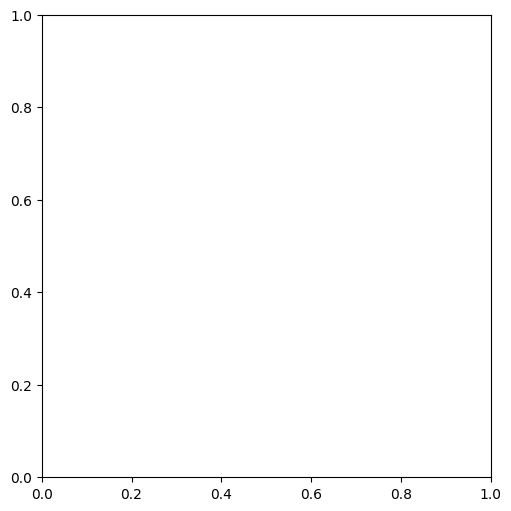

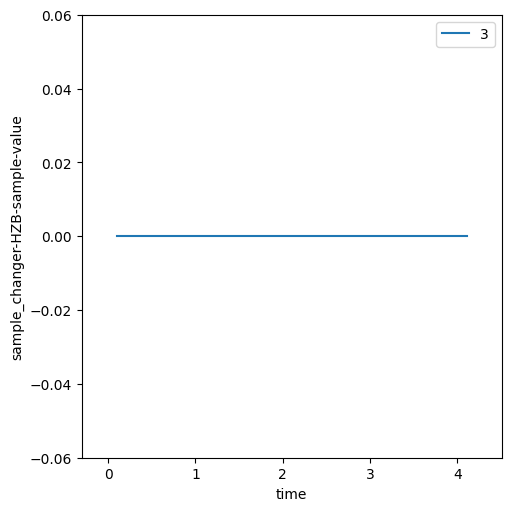

In [5]:
print(await robot_node.storage.read())

p = RE(count([robot_node.storage], num=5, delay=1))
p = RE(count([robot_node.sample], num=5, delay=1))
print(p.plan_result)

In [ ]:
cryoNode = SECoP_Node_Device.create_external_loop(host='localhost',port ='10769',loop= RE.loop)

In [ ]:
client = cryoNode._secclient



fut = asyncio.run_coroutine_threadsafe(client.disconnect(),get_bluesky_event_loop())
print(fut.result(2))

print(client.online)

fut = asyncio.run_coroutine_threadsafe(client.connect(),get_bluesky_event_loop())
print(fut.result(2))
print(client.online)

In [ ]:
fut = asyncio.run_coroutine_threadsafe(cryoNode._secclient.getParameter('cryo','value'),get_bluesky_event_loop())
print(fut.result(2).get_reading())



In [ ]:
fut = asyncio.run_coroutine_threadsafe(cryoNode._secclient.connect(2),get_bluesky_event_loop())

fut.result(2)

cryoNode._secclient.online

In [ ]:
test = {"_nested_struct":{
          "datainfo":{
            "members":{
              "number":{
                "max":100.0,
                "min":0.0,
                "type":"double",
                "unit":"s"
              },
              "pos_struct":{
                "members":{
                  "col":{
                    "type":"string"
                  },
                  "enum":{
                    "members":{
                      "mode_max":2,
                      "mode_one":1,
                      "mode_zero":0
                    },
                    "type":"enum"
                  },
                  "x":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  },
                  "y":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  },
                  "z":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  }
                },
                "type":"struct"
              },
              "string":{
                "type":"string"
              },
              "tupl":{
                "members":[
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  },
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  },
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  }
                ],
                "type":"tuple"
              }
            },
            "type":"struct"
          },
          "description":"nestedstruct dict containing other structs and tuples ",
          "readonly":True
        }
        }

parameter_name = "_nested_struct" 

struct_datainfo =  test['_nested_struct']['datainfo']

path = []

member_path = path + ['members']

print(deep_get(struct_datainfo,member_path))

for keys,value in deep_get(struct_datainfo,member_path).items():

    print(keys)

In [ ]:
    
loop =asyncio.get_running_loop()


ophy_dev = await AsyncFrappyClient.create(host='localhost',port='10771',loop=loop)


ophy_dev.online

In [ ]:
# Python3 code to demonstrate
# inserting K after every Nth number
# using itertool.chain()
from itertools import chain
 
# initializing list
test_list = ['struct']
 
# printing original list
print ("The original list is : " + str(test_list))
 
# initializing k
k = 'members'
 
# initializing N
N = 1
 
# using itertool.chain()
# inserting K after every Nth number
res = ['members'] + list(chain(*[test_list[i : i+N] + [k]
            if len(test_list[i : i+N]) == N
            else test_list[i : i+N]
            for i in range(0, len(test_list), N)]))
 
# printing result
print ("The lists after insertion : " + str(res))

In [ ]:

nest_test = {"_nested_struct":{
          "datainfo":{
            "members":{
              "number":{
                "max":100.0,
                "min":0.0,
                "type":"double",
                "unit":"s"
              },
              "pos_struct":{
                "members":{
                  "col":{
                    "type":"string"
                  },
                  "enum":{
                    "members":{
                      "mode_max":2,
                      "mode_one":1,
                      "mode_zero":0
                    },
                    "type":"enum"
                  },
                  "x":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  },
                  "y":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  },
                  "z":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  }
                },
                "type":"struct"
              },
              "string":{
                "type":"string"
              },
              "tupl":{
                "members":[
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  },
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  },
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  }
                ],
                "type":"tuple"
              }
            },
            "type":"struct"
          },
          "description":"nestedstruct dict containing other structs and tuples ",
          "readonly":True
        }
        }




nest_test['_nested_struct','datainfo'] = 0


print(nest_test)

In [1]:
from AsyncSecopClient import AsyncFrappyClient
import asyncio
from SECoPSignal import deep_get

client = await  AsyncFrappyClient.create('localhost','10771',asyncio.get_running_loop())

reading = await client.getParameter('ophy_struct','nested_struct')

val = reading.get_value()
print(val)

print(val['tupl'][1])

print(val['pos_struct']['x'])
print(deep_get(dictionary=val,keys=['tupl',1],default=None))
client.disconnect(True)

ophyd_secop.frappy.demo ready
{'number': 5.0, 'string': 'blablalbla', 'tupl': (1.0, 1.0, 1.0), 'pos_struct': {'x': 5.0, 'y': 10.0, 'z': 15.0, 'col': 'green', 'enum': <nested_struct.mode_one (1)>}}
1.0
5.0
1.0


<coroutine object AsyncFrappyClient.disconnect at 0x7fa45dca5b40>

In [ ]:
from SECoPSignal import deep_get


datainfo = {
            "members":[
              {
                "members":{
                  "BUSY":300,
                  "ERROR":400,
                  "IDLE":100,
                  "WARN":200
                },
                "type":"enum"
              },
              {
                "type":"string"
              }
            ],
            "type":"tuple"
          }

member_path = ['members',0]

print(deep_get(datainfo,member_path))

In [ ]:
from SECoPSignal import get_memberpath, deep_get

nest_test = {"_nested_struct":{
          "datainfo":{
            "members":{
              "number":{
                "max":100.0,
                "min":0.0,
                "type":"double",
                "unit":"s"
              },
              "pos_struct":{
                "members":{
                  "col":{
                    "type":"string"
                  },
                  "enum":{
                    "members":{
                      "mode_max":2,
                      "mode_one":1,
                      "mode_zero":0
                    },
                    "type":"enum"
                  },
                  "x":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  },
                  "y":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  },
                  "z":{
                    "max":100.0,
                    "min":0.0,
                    "type":"double",
                    "unit":"m"
                  }
                },
                "type":"struct"
              },
              "string":{
                "type":"string"
              },
              "tupl":{
                "members":[
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  },
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  },
                  {
                    "max":100.0,
                    "min":0.0,
                    "type":"double"
                  }
                ],
                "type":"tuple"
              }
            },
            "type":"struct"
          },
          "description":"nestedstruct dict containing other structs and tuples ",
          "readonly":True
        }
        }
datainfo = nest_test['_nested_struct']['datainfo']

path = ['pos_struct']

memberpath = get_memberpath(path) + ['members']
print(memberpath)

for member_name, value in deep_get(datainfo,memberpath).items():
    print(member_name)



In [1]:
import asyncio
from secop_ophyd.SECoPDevices import SECoP_Node_Device
nested_node_dev = await SECoP_Node_Device.create('localhost','10771',asyncio.get_running_loop())

testcmd = nested_node_dev.ophy_struct.test_cmd_dev

await testcmd.name_arg.set('blah')
await testcmd.id_arg.set(2)
await testcmd.sort_arg.set(True)

await testcmd.test_cmd_x.execute()

print(await testcmd.test_cmd_res.read())



ophyd_secop.frappy.demo ready


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'tuple'

In [1]:
from secop_ophyd.AsyncFrappyClient import AsyncFrappyClient
import asyncio
import logging
import time

class NoRXFilter(logging.Filter):
    def filter(self, record):
        return not record.getMessage().startswith('RX')
class NoTXFilter(logging.Filter):
    def filter(self, record):
        return not record.getMessage().startswith('TX')




logger = logging.getLogger('async_client')
logger.setLevel(logging.DEBUG)

logger.addFilter(NoRXFilter())
logger.addFilter(NoTXFilter())

logging.basicConfig(
    datefmt='%d/%m/%Y %I:%M:%S',
    format='%(asctime)s.%(msecs)03d  %(name)-12s %(levelname)-8s %(message)s',
    filename='asyncclient.log',
    encoding='utf-8',
    level=logging.DEBUG,
    filemode='w')

    

client:AsyncFrappyClient = await AsyncFrappyClient.create('localhost','10771',asyncio.get_running_loop(),log=logger)


await client.disconnect(shutdown=True)

await asyncio.sleep(2)

print(client.state)
time.sleep(2)

client.client._shutdown = False
await client.connect(3)

print(client.state)


logger.info('are we connected?')

In [10]:
import asyncio
from secop_ophyd.SECoPDevices import SECoP_Node_Device,SECoPReadableDevice,SECoP_CMD_Device
from ophyd.v2.core import observe_value
robo_node = await SECoP_Node_Device.create('localhost','10770',asyncio.get_running_loop())




ophyd_secop.frappy.demo ready


In [6]:
storage:SECoPReadableDevice= robo_node.storage

reading = await storage.value.read()

loadshort:SECoP_CMD_Device = storage.load_short_dev


reading = await storage.value.read()
print(reading)

for samplepos in range(1,13):
    await loadshort.samplepos_arg.set(samplepos)
    await loadshort.substance_arg.set(2)

    await loadshort.load_short_x.execute()

    await storage.wait_for_IDLE()
    print(samplepos)







{'sample_changer-HZB-storage-value': {'value': ["{'sample_name': 'KnusperflakesRittersport', 'substance': 'Knusperflakes', 'substance_code': '2', 'sample_pos': 1, 'manufacturer': 'Rittersport', 'sample_id': 'cbae24fd-e39b-43ae-a64d-d03b4fd85984', 'color': 'yellow', 'mass': 0.0167}", "{'sample_name': 'KnusperflakesRittersport', 'substance': 'Knusperflakes', 'substance_code': '2', 'sample_pos': 2, 'manufacturer': 'Rittersport', 'sample_id': '759ecf53-1b84-4e74-ad77-77f15a68c758', 'color': 'yellow', 'mass': 0.0167}", "{'sample_name': 'KnusperflakesRittersport', 'substance': 'Knusperflakes', 'substance_code': '2', 'sample_pos': 3, 'manufacturer': 'Rittersport', 'sample_id': '0376e5fb-872f-416d-bbd6-c5c6d0462c08', 'color': 'yellow', 'mass': 0.0167}", "{'sample_name': 'KnusperflakesRittersport', 'substance': 'Knusperflakes', 'substance_code': '2', 'sample_pos': 4, 'manufacturer': 'Rittersport', 'sample_id': 'b9f26bc8-1fb9-4171-a0c2-772fb19bacfa', 'color': 'yellow', 'mass': 0.0167}", "{'sampl

ImpossibleError: Sample pos 1 is already occupied

In [3]:
print(await storage.value.describe())

{'sample_changer-HZB-storage-value': {'source': 'localhost:10770:sample_changer.HZB:storage:value', 'dtype': 'array', 'shape': [1, 12], 'description': 'Sample objects in storage', 'readonly': True, 'SECoPtype': 'array', 'minlen': 0, 'maxlen': 12, 'members': {'type': 'struct', 'members': {'sample_name': {'type': 'string'}, 'substance': {'type': 'string'}, 'substance_code': {'type': 'string'}, 'sample_pos': {'min': 0, 'max': 12, 'type': 'int'}, 'manufacturer': {'type': 'string'}, 'sample_id': {'type': 'string'}, 'color': {'type': 'string'}, 'mass': {'unit': 'kg', 'min': 0.0, 'max': 1.0, 'type': 'double'}}}}}


In [ ]:
test_list = [{'x': 1, 'y': 4}, {'x': 2, 'y': 5}, {'x': 3, 'y': 6}] 



res = {key: [i[key] for i in test_list] for key in test_list[0]}
print(res)



{'x': [1, 2, 3], 'y': [4, 5, 6]}


In [7]:
import asyncio
from secop_ophyd.SECoPDevices import SECoP_Node_Device,SECoPReadableDevice,SECoP_CMD_Device
from ophyd.v2.core import observe_value
nested = await SECoP_Node_Device.create('localhost','10771',asyncio.get_running_loop())

ophyd_secop.frappy.demo ready


In [23]:
str_test:SECoPReadableDevice = nested.str_test

print(await str_test.read())
print(await str_test.describe())

{'ophyd_secop-frappy-demo-str_test-value': {'value': 'lnyhzhxxmg', 'timestamp': 1691575998.1524138}}
{'ophyd_secop-frappy-demo-str_test-value': {'source': 'localhost:10771:ophyd_secop.frappy.demo:str_test:value', 'dtype': 'string', 'shape': [], 'description': 'string read value', 'readonly': True, 'SECoPtype': 'string'}}
